LLM은 언어의 구조의 의미를 깊이 이해ㅐ하고 있으며, 이를 바탕으로 복잡한 질문에 답할 수 있음.   
자연어 이해(NLU)와 자연어 생성(NLG) 능력이 결합되어, 유익한 응답 제공 가능
   
   
문

In [1]:
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import stream_response

gpt = ChatOpenAI(
    temperature = 0,
    model_name="gpt-4o",
)

answer = gpt.stream("세계에서 가장 높은 빌딩은 무엇인가요?")

stream_response(answer)

현재 세계에서 가장 높은 빌딩은 아랍에미리트 두바이에 위치한 부르즈 할리파입니다. 이 빌딩은 828미터(2,717피트) 높이로, 2010년에 완공되었습니다.

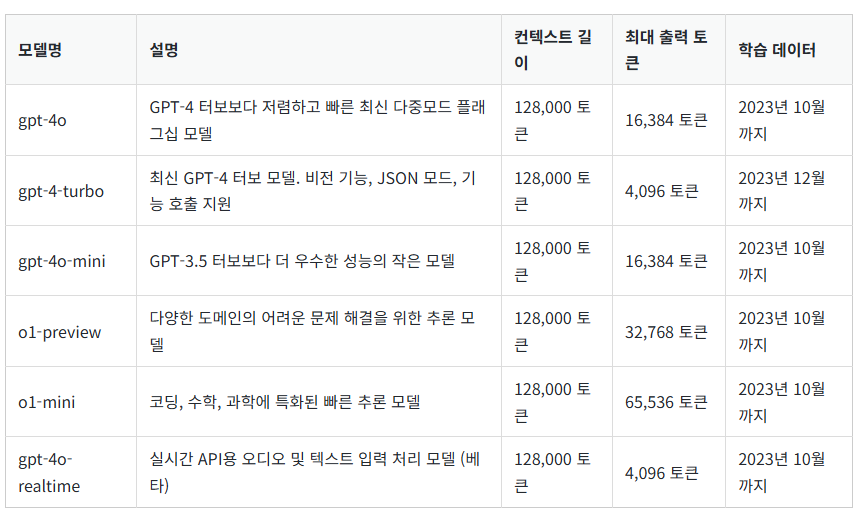

In [4]:
from langchain_anthropic import ChatAnthropic

antropic = ChatAnthropic(model_name="cluade-3-5-sonnet-20241022")

answer = antropic.stream("세계에서 가장 높은 빌딩은 무엇인가요?")

stream_response(answer)

TypeError: "Could not resolve authentication method. Expected either api_key or auth_token to be set. Or for one of the `X-Api-Key` or `Authorization` headers to be explicitly omitted"

In [5]:
from dotenv import load_dotenv

load_dotenv()

True

캐싱   
동일한 완료를 여러번 요청하는 경우 LLM 공급자에 대한API 호출 횟수를 줄여 비용 절감 가능   
LLM 제공업체에 대한 API 호출 횟수를 줄여 에플리케이션의 속도를 높일 수 있음.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate


yongs_llm = ChatOpenAI(model_name="gpt-3.5-turbo")

prompt = PromptTemplate.from_template("{random} 에 대해서 100자 내외로 요약해줘")

chain = prompt | yongs_llm

In [13]:
import time

start = time.time()
response = chain.invoke({"random" : "비트코인"})
print(response.content)
end = time.time()
print(f"실행시간: {end - start:.4f}초")


비트코인은 가상화폐 중 가장 유명하고 가치가 높은 암호화폐로, 2009년에 출시되었다. 블록체인 기술을 기반으로 한 분산원장 기술을 사용하여 중앙 은행 없이 거래되며, 송금 및 결제 시스템으로 사용된다. 비트코인은 채굴을 통해 생성되며, 유통량은 2100만 개로 한정되어 있다. 비트코인은 가치가 변동적이며, 안전하고 익명성을 제공하는 디지털 자산이다.
실행시간: 2.0378초


InMemoryCache   
인메모리 캐시를 사용하여 동일 질문에 대한 답변을 저장하고, 캐시에 저장된 답변을 반환환

In [ ]:
# 첫번째 질의

from langchain.globals import set_llm_cache
from langchain.cache import InMemoryCache

set_llm_cache(InMemoryCache())

start = time.time()
response = chain.invoke({"random" : "비트코인"})
print(response.content)
end = time.time()

print(f"실행시간: {end - start:.4f}초")

비트코인은 2009년에 만들어진 최초의 암호화폐로, 중앙 관리기관이 없는 탈중앙화된 화폐 시스템이다. 블록체인 기술을 기반으로 하고 있으며, 전 세계적으로 사용되는 디지털 화폐로서 안전하고 투명한 거래를 가능하게 한다. 사용자 간 직접 거래가 가능하며, 데이터 기반의 분산장부를 통해 소유 및 거래 내역을 관리한다. 디지털 자산으로서 투자 수단 또는 결제 수단으로 활용되고 있다.
실행시간: 2.9095초


In [ ]:
#두번째 질의
start = time.time()
response = chain.invoke({"random" : "비트코인"})
print(response.content)
end = time.time()

print(f"실행시간: {end - start:.4f}초")

비트코인은 2009년에 만들어진 최초의 암호화폐로, 중앙 관리기관이 없는 탈중앙화된 화폐 시스템이다. 블록체인 기술을 기반으로 하고 있으며, 전 세계적으로 사용되는 디지털 화폐로서 안전하고 투명한 거래를 가능하게 한다. 사용자 간 직접 거래가 가능하며, 데이터 기반의 분산장부를 통해 소유 및 거래 내역을 관리한다. 디지털 자산으로서 투자 수단 또는 결제 수단으로 활용되고 있다.
실행시간: 0.0030초


In [ ]:
#세번째 질의
start = time.time()
response = chain.invoke({"random" : "비트코인"})
print(response.content)
end = time.time()

print(f"실행시간: {end - start:.4f}초")

비트코인은 2009년에 만들어진 최초의 암호화폐로, 중앙 관리기관이 없는 탈중앙화된 화폐 시스템이다. 블록체인 기술을 기반으로 하고 있으며, 전 세계적으로 사용되는 디지털 화폐로서 안전하고 투명한 거래를 가능하게 한다. 사용자 간 직접 거래가 가능하며, 데이터 기반의 분산장부를 통해 소유 및 거래 내역을 관리한다. 디지털 자산으로서 투자 수단 또는 결제 수단으로 활용되고 있다.
실행시간: 0.0010초


**SQLite Cache**

In [18]:
from langchain_community.cache import SQLiteCache
from langchain_core.globals import set_llm_cache
import os

if not os.path.exists("cache"):
    os.makedirs("cache")

set_llm_cache(SQLiteCache(database_path="cache/llm_cache.db"))




In [19]:
start = time.time()
response = chain.invoke({"random" : "비트코인"})
print(response.content)
end = time.time()

print(f"실행시간: {end - start:.4f}초")

비트코인은 가상화폐 중 가장 유명한 암호화폐로, 중앙은행이나 정부와 같은 중앙기관이 없이 분산화된 시스템에서 운영됩니다. 블록체인 기술을 기반으로 하며, 거래 기록은 블록에 연결되어 체인을 형성하므로 변경이 어렵다는 특징이 있습니다. 거래 속도가 빠르고 수수료가 낮으며 익명성이 보장되기 때문에 전 세계적으로 사용되고 있습니다.하지만 변동성이 크고 안정성에 대한 우려가 있습니다.
실행시간: 2.0536초


In [20]:
start = time.time()
response = chain.invoke({"random" : "비트코인"})
print(response.content)
end = time.time()

print(f"실행시간: {end - start:.4f}초")

비트코인은 가상화폐 중 가장 유명한 암호화폐로, 중앙은행이나 정부와 같은 중앙기관이 없이 분산화된 시스템에서 운영됩니다. 블록체인 기술을 기반으로 하며, 거래 기록은 블록에 연결되어 체인을 형성하므로 변경이 어렵다는 특징이 있습니다. 거래 속도가 빠르고 수수료가 낮으며 익명성이 보장되기 때문에 전 세계적으로 사용되고 있습니다.하지만 변동성이 크고 안정성에 대한 우려가 있습니다.
실행시간: 0.0029초


InmemoryCache와 SQLite Cache 비교   

- InmemoryCache
  - 메모리 기반 캐시(RAM에 저장)
  - 프로그램 종료 시 캐시 데이터 사라짐
  - 속도면에선 가장 우수
  - 사용 예 : 짧은 테스트, 개발 단계, 임시 캐싱

- SQLiteCache
  - 로컬 SQLite DB에 캐시 저장
  - 프로그램 종료 후에도 캐시 유지
  - 여러세션에서 동일 결과 재사용 가능
  - 속도는 느리지만 실용적임

**직렬화(Serialization)**   
- 정의 : 모델을 저장 가능한 형식으로 변환하는 과정                         -> 문자열(serial) 형태로 바꾸는 것
- 목적 : 모델 재사용(재훈련 없이), 모델 배포 및 공유 용이, 계산 리소스 절약  -> 직렬화 한 체인을 역직렬화해서 다시 로딩하여 사용 가능
- 장점 : 빠른 모델 로딩, 버전 관리 가능, 다양한 환경에서 사용가능


In [1]:
from dotenv import load_dotenv
load_dotenv()


True

is_lc_serializable 클래스 메서드   
LangChain 클래스가 직렬화 가능한지 확인

In [3]:
import os
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("{fruit}의 색상이 무엇입니까?")



In [6]:
#직렬화가 가능한지 체크

print(f"{ChatOpenAI.is_lc_serializable()}")

True


In [7]:
yongs_llm = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0
    )

print(f"{yongs_llm.is_lc_serializable()}")

True


In [8]:
chain = prompt | yongs_llm

chain.is_lc_serializable()

True

**체인 직렬화**   
- 딕셔너리 또는 JSON 문자열로 변환화는 과정을 의미
   
방법
- dumps : JSON 문자열로 직렬화
- dumpd : 객체를 딕셔너리로 직렬화



In [9]:
from langchain_core.load import dumpd,dumps

dumpd_chain = dumpd(chain)
dumpd_chain

{'lc': 1,
 'type': 'constructor',
 'id': ['langchain', 'schema', 'runnable', 'RunnableSequence'],
 'kwargs': {'first': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'prompts', 'prompt', 'PromptTemplate'],
   'kwargs': {'input_variables': ['fruit'],
    'template': '{fruit}의 색상이 무엇입니까?',
    'template_format': 'f-string'},
   'name': 'PromptTemplate'},
  'last': {'lc': 1,
   'type': 'constructor',
   'id': ['langchain', 'chat_models', 'openai', 'ChatOpenAI'],
   'kwargs': {'model_name': 'gpt-3.5-turbo',
    'temperature': 0.0,
    'openai_api_key': {'lc': 1, 'type': 'secret', 'id': ['OPENAI_API_KEY']}},
   'name': 'ChatOpenAI'}},
 'name': 'RunnableSequence'}

In [10]:
type(dumpd_chain)

dict

In [11]:
dumps_chain = dumps(chain)
dumps_chain

'{"lc": 1, "type": "constructor", "id": ["langchain", "schema", "runnable", "RunnableSequence"], "kwargs": {"first": {"lc": 1, "type": "constructor", "id": ["langchain", "prompts", "prompt", "PromptTemplate"], "kwargs": {"input_variables": ["fruit"], "template": "{fruit}\\uc758 \\uc0c9\\uc0c1\\uc774 \\ubb34\\uc5c7\\uc785\\ub2c8\\uae4c?", "template_format": "f-string"}, "name": "PromptTemplate"}, "last": {"lc": 1, "type": "constructor", "id": ["langchain", "chat_models", "openai", "ChatOpenAI"], "kwargs": {"model_name": "gpt-3.5-turbo", "temperature": 0.0, "openai_api_key": {"lc": 1, "type": "secret", "id": ["OPENAI_API_KEY"]}}, "name": "ChatOpenAI"}}, "name": "RunnableSequence"}'

In [12]:
type(dumps_chain)

str

**Pickle 파일**
- Python 객체를 바이너리 형태로 직렬화하는 포맷

방법
- pickle.dump() : 객체를 파일에 저장
- pickle.load() : 파일에서 객체 로드

In [13]:
import pickle
with open("fruit_chain.pkl", "wb") as f:              #wb가 뜻하는 의미?
    pickle.dump(dumpd_chain,f)

In [34]:
import json

with open("fruit_chain.json", "w") as fp:
    json.dump(dumpd_chain, fp)


NameError: name 'dumpd_chain' is not defined